In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

We work with 1956 comments from 5 different YouTube videos. The comments were collected via the YouTube API from five of the ten most viewed videos on YouTube in the first half of 2015. All 5 are music videos. One of them is “Gangnam Style” by Korean artist Psy. The other artists were Katy Perry, LMFAO, Eminem, and Shakira.

The comments were manually labeled as spam or legitimate. Spam was coded with a “1” and legitimate comments with a “0”.

In [2]:
df = dd.read_csv('*.csv')

In [6]:
df.head(2)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1


In [9]:
#here we can see there are 1005 counts of spam and 951 counts of non-spam
df.CLASS.value_counts().compute()

1    1005
0     951
Name: CLASS, dtype: int64

In [44]:
#here we can see 461 counts of content contains check and is spam
#vs 19 counts of content contains check and is not spam
df[df.CONTENT.str.lower().str.contains('check')].CLASS.value_counts().compute()

1    461
0     19
Name: CLASS, dtype: int64

## AWS and DataBricks
While both AWS and DataBricks have roughly the same goals, i.e. helping people with data-processing and machine learning in the cloud, they have some quite big differences.  DataBricks is more for Data Scientists is simple to configure with a very easy way to switch between programming langauges (spark, sql, python) and  some nice ready made visualizations.  On teh negative side you can only choose two instance types : more memory or better CPU.  AWS is more for developers as configuring it and though can be overwhelming with a huge amount of choice, it has more flexability, and is also cheaper.

## Spark and Dask
Learning Spark this week was somewhat challenging at first as it is a very different style programming leanguage to python.  Though it is still very readable, it seems much less forgiving to a learner.  However after a few days you begin to see the advantages with very quick processing times on huge amounts of data.
While Dask is an imporvement on pandas in terms of speed it is slightly more fiddly to use (having the dataframes partitioned) and though we didn't encounter the problem yet, apparently it's not so good for the huge dataframes that Spark is able to process.

In [42]:
#some visualizations
#make a new column length of comment, month
df['comment_length'] = df['CONTENT'].str.len()
df["DATE"] = dd.to_datetime(df["DATE"], format="%Y-%m-%d")
df["month"] = df["DATE"].map(lambda x: x.month)
df["year"] = df["DATE"].map(lambda x: x.year)
df['comment_length'].max().compute(),df['comment_length'].min().compute()

(1200, 2)

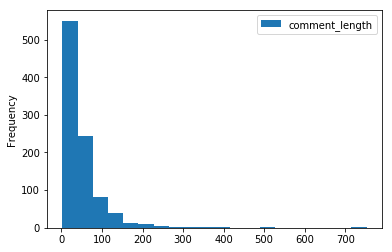

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

#here we plot comment lenght when not spam
df[df['CLASS']==0][['comment_length']].compute().plot(kind="hist",bins=20);


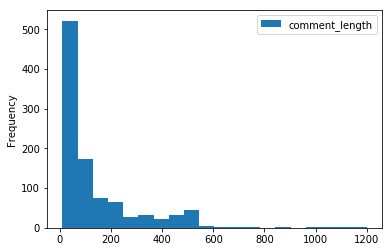

In [41]:
#here we plot comment lenght when spam - you can see there are a lot more very long comment
#i.e. above 300 words
df[df['CLASS']==1][['comment_length']].compute().plot(kind="hist",bins=20);